In [ ]:
# conda init
# source ~/.bashrc
# conda activate vaex
# cd Thesis-Project/4_Gravity
# python mcmc-dm-full-script.py 4 50000 36

In [2]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy import interpolate
from os.path import join, abspath
import sys
from os import pardir
from scipy.stats import norm


# styling
plt.style.use('seaborn-v0_8-whitegrid')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

In [113]:
root_data_dir = abspath(join(pardir, "Data"))
gums_dir = join(root_data_dir, "GUMS")
spectral_dir = join(root_data_dir, "Spectral-Class-2")
ml_dir = join(root_data_dir, "Machine-Learning")

In [119]:
files = glob(join(spectral_dir, "*.hdf5"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/Spectral-Class-2/gaia_(-0.10)_(0.09).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-2/gaia_(0.09)_(0.17).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-2/gaia_(0.17)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-2/gaia_(0.24)_(0.29).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-2/gaia_(0.29)_(0.33).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-2/gaia_(0.33)_(0.38).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-2/gaia_(0.38)_(0.41).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-2/gaia_(0.41)_(0.45).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-2/gaia_(0.45)_(0.48).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-2/gaia_(0.48)_(0.51).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-2/gaia_(0.51)_(0.54).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-2/gaia_(0.54)_(0.57).hdf5',
 '/home2/s20321

# disk

In [10]:
# load pytorch model from file
import torch

# load model
model = torch.load("model-disk.pth")

model

OrderedDict([('hidden.weight',
              tensor([[ 7.2491e-03, -6.3433e-02,  3.9761e-03, -2.8629e-01,  1.1410e-01,
                       -3.3403e-01, -2.2471e-01, -3.1135e-01],
                      [ 1.2018e-01,  3.0140e-02,  3.9709e-02, -1.4993e+00, -5.5030e-02,
                        1.9079e-01, -2.3885e+00,  1.1832e+00],
                      [-2.9894e-01,  3.2021e-01, -6.9109e-02, -1.9088e-01, -3.2135e-01,
                       -6.9541e-02, -2.9720e-01,  1.1140e-01],
                      [-1.6890e-01, -5.8049e-01,  4.8992e-02,  1.4114e-01, -3.1582e-01,
                        1.0806e-01, -2.1489e-01, -4.0788e-02],
                      [-5.9987e-03,  1.6023e-01, -3.2584e-01,  1.2538e+00,  8.2289e-02,
                        5.8096e-01, -3.7930e-01,  4.2818e+00],
                      [-3.8565e-01, -1.0688e-01, -5.9868e-02, -7.5109e-01,  3.0041e-01,
                        6.9779e-02, -9.4585e-01, -1.4290e+00],
                      [-3.4910e-01, -8.9126e-02, -8.2247e-02, -

In [12]:
df = vaex.open(join(gums_dir, "training-features.hdf5"))
df

#,x,y,z,u,v,w,feh,alphafe
0,0.7434479,0.8172439,0.651944,0.5225474,0.3354713,0.5477383,0.60421485,0.65819347
1,0.42750397,0.7245903,0.18120801,0.46718943,0.5161425,0.52898175,0.8283499,0.47446066
2,0.46124792,0.8015331,0.08127206,0.44113094,0.47320795,0.5040335,0.7239277,0.48349744
3,0.46769255,0.70576847,0.21790802,0.45099676,0.4918303,0.4981806,0.741804,0.48322296
4,0.4467581,0.6693402,0.2436749,0.45314753,0.52915704,0.49792472,0.73924935,0.49246702
...,...,...,...,...,...,...,...,...
"999,995",0.45749027,0.8320434,0.06541053,0.4809608,0.4958323,0.5241243,0.756101,0.47391695
"999,996",0.47017097,0.65553516,0.2770652,0.47113353,0.496723,0.52276605,0.72259444,0.487642
"999,997",0.48493814,0.6092988,0.35093194,0.47083196,0.46015114,0.49659002,0.7825337,0.43951663
"999,998",0.47178334,0.6878224,0.237374,0.4553533,0.47104722,0.5100633,0.6548438,0.5981529


In [13]:
files = glob(join(spectral_dir, "*.hdf5"))
files

['/home2/s20321005/Thesis-Project/Data/Spectral-Class/gaia_(-0.10)_(0.19).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class/gaia_(0.34)_(0.37).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class/gaia_(0.19)_(0.25).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class/gaia_(0.25)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class/gaia_(0.30)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class/gaia_(0.37)_(0.40).hdf5']

In [14]:
df = vaex.open(files[0])
df

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.015001035107721182,-0.6327032341312814,6.328,6.147,AAA,2309505074424681216,72.66107,72.43709690954289,0.017654924,5.700719249686951,0.018953288,15.128966943492442,0.023012508,6.896962,7.049383,6.608709,1995.0613,1868.7145,1.0332532,1.1791586,2.93417523672915,-1.3321876411487132,65.9736,65.7123,66.1868,0.0009,0.0002,0.0024,F,--,21.535423278808594,0.29714885354042053,gaia,7024.02783203125,2.85302734375,2.6767578125,0.0,gspphot,4.101500034332275,0.006999969482421875,0.010900020599365234,0.0,gspphot,-0.6507999897003174,0.03420001268386841,0.06970000267028809,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.18100023,2.2270464384374353,66.09836638119822,-64.22565118387317,15.622412370391638,-40.60524084752324,-60.256498606879646,0.018461531214291817,0.018168525583656014,-18.878738017169375,-12.721876010182475,-0.029274990791032934,-0.020197062602119592,-25.387284222140156,0.2888128532199686,-13.253942988508776,0.07577335983802115,10.349999518003198,0.07426579562096026,15.178624573340988,0.02518164013089561,1.2062107377167934,2.6719040213508887
1,0.008917061681364228,-0.048279332675252175,6.333,6.209,AAA,2448569690198755840,38.381847,38.23798058974192,0.0321581,-3.320105645310672,0.020777702,15.648562219917743,0.0318378,6.871397,7.0071115,6.608102,716.1039,1091.4459,1.0634098,1.1764566,-1.4844818198754623,-1.0982041189149518,63.5987,62.8197,63.8374,0.0004,0.0,0.0015,A,--,9.158726692199707,0.3001042306423187,gaia,7234.37060546875,3.57373046875,3.30517578125,0.0,gspphot,4.155799865722656,0.003200054168701172,0.00820016860961914,0.0,gspphot,-1.3895000219345093,0.062399983406066895,0.07220005989074707,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.12400007,2.305372388159757,63.90363446471675,-56.8992413574995,29.08867186279142,33.346648213326496,-19.00440249032187,0.030476525523901784,0.023174072685925768,-5.756494848419319,10.100807365547125,-0.013654361742468372,0.02252880254356858,-10.775183541282718,0.2672824782536821,-0.9565182768560057,0.13714615438495595,-10.145663157583355,0.025368455825438258,-0.08219332519347466,0.13664939098167272,0.9141710959654313,2.3284855063378016
2,0.012143285350383228,-0.05090636735876901,8.06,7.915,AAA,2448552098012705920,31.925608,-15.473064449157619,0.03462117,-27.925412691245555,0.017145172,5.743828297800484,0.03162395,8.575427,8.718618,8.305569,2121.3027,4497.2544,1.1130936,1.1753169,-1.4804480789660437,-1.1019347508945627,175.73,174.7979,176.8073,0.0174,0.0132,0.0214,F,--,1.9226019382476807,0.745744526386261,gaia,7142.38037109375,9.451171875,9.0673828125,0.0,gspphot,4.040999889373779,0.004399776458740234,0.003799915313720703,0.0,gspphot,-0.35260000824928284,0.009900003671646118,0.00830000638961792,0.0,gspphot,0.2800000011920929,nan,nan,nan,rave,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.14500046,1.8560076641998857,174.09991179279078,-155.31162157943774,78.67070286086846,-25.666719617373488,-18.985886903363205,0.032292736727151106,0.02120758345611108,-15.667791454769487,-21.18103896541238,-0.0880200230554166,-0.11962315390911099,-8.79494179484499,0.6664541256144392,-13.108206822765283,0.34600769000881776,19.911956430279062,0.12315768295089626,-14.965810665693192,0.34476543566107015,1.0002579192848187,2.425756487089

In [16]:
df['x'] = df.evaluate('r*cos(GLON)')
df['y'] = df.evaluate('r*sin(GLON)')

In [18]:
df_filt = df[['x', 'y', 'z', 'u', 'v', 'w', 'mh', 'alphafe']]
df_filt

#,x,y,z,u,v,w,mh,alphafe
0,-15.287561857759215,3.217175891329429,-64.22565118387317,15.178624573340988,10.349999518003198,-25.387284222140156,-0.6507999897003174,nan
1,2.507657903851276,-28.98038099436247,-56.8992413574995,-0.08219332519347466,-10.145663157583355,-10.775183541282718,-1.3895000219345093,nan
2,7.09809422710027,-78.3498343774016,-155.31162157943774,-14.965810665693192,19.911956430279062,-8.79494179484499,-0.35260000824928284,0.2800000011920929
3,21.613241651795196,-109.42669723034632,-165.92164671722244,0.6467700722242922,0.026037926233027392,-24.24864378039954,-0.8805000185966492,nan
4,5.072409162982701,-22.312342327598337,-29.780755668887814,0.2429374123330339,19.00425552701665,-10.350568855849389,-0.7408999800682068,nan
...,...,...,...,...,...,...,...,...
"5,749",48.06597400934911,-132.8753022635387,-75.06618379858095,nan,nan,nan,nan,nan
"5,750",35.41912146260739,-88.0369014588816,-39.56720209542047,-3.1044846823131946,-0.7547967925738468,-20.03367711765237,-0.8852999806404114,nan
"5,751",41.910464434729455,-89.33829123478229,-14.775466648609452,-14.191131177366675,10.469937492428784,-2.5062265328506603,-0.08540000021457672,nan
"5,752",49.68655773201991,-94.26158657091669,8.324303525805602,25.82864137439885,-33.34359749097961,-15.38497591661856,-0.47620001435279846,nan


# Main Sequence 

In [114]:
df_training = vaex.open(join(gums_dir, "training-features-main.hdf5"))
df_training

#,M_G,br,logg
0,0.2073501,0.14309636,0.50423455
1,0.3383096,0.28111374,0.5550488
2,0.45702878,0.49024275,0.5912052
3,0.34276977,0.2819223,0.55298585
4,0.33887124,0.32243428,0.5502714
...,...,...,...
"999,995",0.20655873,0.1509257,0.49967426
"999,996",0.31836158,0.2808372,0.5376764
"999,997",0.1557928,0.18162745,0.38990226
"999,998",0.4412022,0.10347706,0.9098805


In [120]:
df = vaex.open(files[1])
df['x'] = df.evaluate('r*cos(GLON)')
df['y'] = df.evaluate('r*sin(GLON)')
df['br'] = df.evaluate('bpmag-rpmag')
df['M_G'] = df.evaluate('gmag + 5*log10(parallax/1000) + 5')
df['index'] = np.arange(len(df))
df

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,x,y,br,M_G,index
0,0.008917061681364228,-0.048279332675252175,6.333,6.209,AAA,2448569690198755840,38.381847,38.23798058974192,0.0321581,-3.320105645310672,0.020777702,15.648562219917743,0.0318378,6.871397,7.0071115,6.608102,716.1039,1091.4459,1.0634098,1.1764566,-1.4844818198754623,-1.0982041189149518,63.5987,62.8197,63.8374,0.0004,0.0,0.0015,A,--,9.158726692199707,0.3001042306423187,gaia,7234.37060546875,3.57373046875,3.30517578125,0.0,gspphot,4.155799865722656,0.003200054168701172,0.00820016860961914,0.0,gspphot,-1.3895000219345093,0.062399983406066895,0.07220005989074707,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.12400007,2.305372388159757,63.90363446471675,-56.8992413574995,29.08867186279142,33.346648213326496,-19.00440249032187,0.030476525523901784,0.023174072685925768,-5.756494848419319,10.100807365547125,-0.013654361742468372,0.02252880254356858,-10.775183541282718,0.2672824782536821,-0.9565182768560057,0.13714615438495595,-10.145663157583355,0.025368455825438258,-0.08219332519347466,0.13664939098167272,0.9141710959654313,2.3284855063378016,2.507657903851276,-28.98038099436247,0.3990097,2.8437692234869036,0
1,0.012143285350383228,-0.05090636735876901,8.06,7.915,AAA,2448552098012705920,31.925608,-15.473064449157619,0.03462117,-27.925412691245555,0.017145172,5.743828297800484,0.03162395,8.575427,8.718618,8.305569,2121.3027,4497.2544,1.1130936,1.1753169,-1.4804480789660437,-1.1019347508945627,175.73,174.7979,176.8073,0.0174,0.0132,0.0214,F,--,1.9226019382476807,0.745744526386261,gaia,7142.38037109375,9.451171875,9.0673828125,0.0,gspphot,4.040999889373779,0.004399776458740234,0.003799915313720703,0.0,gspphot,-0.35260000824928284,0.009900003671646118,0.00830000638961792,0.0,gspphot,0.2800000011920929,nan,nan,nan,rave,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.14500046,1.8560076641998857,174.09991179279078,-155.31162157943774,78.67070286086846,-25.666719617373488,-18.985886903363205,0.032292736727151106,0.02120758345611108,-15.667791454769487,-21.18103896541238,-0.0880200230554166,-0.11962315390911099,-8.79494179484499,0.6664541256144392,-13.108206822765283,0.34600769000881776,19.911956430279062,0.12315768295089626,-14.965810665693192,0.34476543566107015,1.0002579192848187,2.4257564870891124,7.09809422710027,-78.3498343774016,0.4130497,2.3714342999420737,1
2,0.015392023766752952,0.08282170240683259,8.558,8.398,AAA,2741902384419052416,13.715906,4.639975154616401,0.022682155,-12.907234376349052,0.018533787,5.001793018338762,0.020396296,9.120099,9.266358,8.84375,1366.1663,1695.7045,0.9842217,1.1767597,-1.3757928446659748,-0.9789386987200558,194.4581,194.1627,195.9448,0.0445,0.0345,0.0519,F,--,20.480899810791016,0.42784982919692993,gaia,7309.1044921875,25.94287109375,20.001953125,0.0,gspphot,4.082799911499023,0.0076999664306640625,0.0012998580932617188,0.0,gspphot,-0.8805000185966492,0.015799999237060547,0.02110004425048828,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.15999985,2.0536281909628444,199.9283049765479,-165.92164671722244,111.54072924918852,0.10529109443016613,-13.715501539021382,0.022265241848635698,0.01903261390676254,-12.997634459602953,0.09978017598272111,-0.05598656204122589,0.02110380551514522,-24.24864378039954,0.3564462181

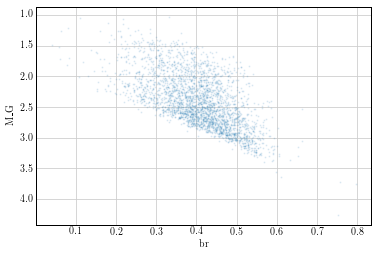

In [121]:
# hr diagram
df.viz.scatter("br", "M_G", s=1, alpha=0.1)
plt.gca().invert_yaxis()
plt.show()

In [117]:
df_filt = df
df_filt = df_filt.dropna(["logg"])
df_filt = df_filt.extract()
df_filt

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,x,y,br,M_G,index
0,0.004301747913975464,-1.3713712365508404,8.77,8.402,AAA,4635683001439449856,52.405643,6.083750336375101,0.014473084,-52.05131516947817,0.0170755,6.084070263466513,0.012370593,9.739897,10.054115,9.259166,2948.124,3927.41,0.98334277,1.198375,2.2006728782412583,-0.667469077944412,164.0287,163.6091,164.8086,0.0013,0.0002,0.0046,G,--,10.902939796447754,0.16833698749542236,gaia,5751.5439453125,2.11181640625,5.791015625,0.0,gspphot,4.159900188446045,0.0024003982543945312,0.0015997886657714844,0.0,gspphot,-0.10779999941587448,0.005900003015995026,0.007100000977516174,0.0,gspphot,0.019999999552965164,0.009999999776482582,0.019999999552965164,0.0,gspspec,-0.15000000596046448,0.12000000476837158,0.12000000663101673,0.0,gspspec,-0.15000000596046448,nan,nan,nan,--,0.36800003,2.690971562626711,164.36365076267728,-101.74113412975117,129.0897026025985,-18.774503486840842,48.92718516173083,0.014645726854753158,0.0169276560588158,38.118372672189736,-14.626909728836896,0.07861918077846189,-0.03185425505242847,23.188897995532177,0.12112157767100891,32.158349477759415,0.14088250554201617,-30.762724218692966,0.08688682310685122,-17.37126155447248,0.11538307459562744,2.5783971929631515,4.142245110066469,-76.03964433764918,104.31741852169819,0.79494953,3.660867879155031,0
1,0.012089511756129283,-1.1802200541587882,9.79,9.422,AAA,4707395142667347200,55.5573,45.541284056921,0.011084056,-31.821457280784504,0.013035413,5.1126040352461954,0.011990312,10.791124,11.114726,10.302908,2982.4573,3661.262,0.91392004,1.198237,2.2677790004490594,-0.852410398788433,194.9628,194.4464,195.4993,0.0034,0.0009,0.0072,G,--,5.178514003753662,0.25194892287254333,gaia,5709.31396484375,4.2705078125,6.6767578125,0.0,gspphot,4.331099987030029,0.0019001960754394531,0.0015997886657714844,0.0,gspphot,0.03440000116825104,0.005900001153349876,0.006999999284744263,0.0,gspphot,-0.0,0.019999999552965164,0.019999999552965164,1.0,gspspec,-0.05999999865889549,0.17000000551342964,0.15000000223517418,0.0,gspspec,-0.05999999865889549,nan,nan,nan,--,0.36800003,3.3332107541903064,195.5950418037499,-147.25745207489157,128.7348561447974,-52.72153128717086,17.522951685199182,0.011255175954797931,0.012887952153683845,16.245887695436295,-48.87921235018077,0.03993026911927194,-0.11510770781631502,6.793818623597339,0.19149650955763106,15.639370281742906,0.16852825566004173,-47.51874644988303,0.13961761714494045,19.38391185017246,0.1488572414674925,2.5783971929631515,4.142245110066469,-82.63580268969595,98.7116371075433,0.8118181,4.334335136209349,1
2,0.007013186720118735,-1.1460579567646323,10.02,9.668,AAA,4900011055658377600,20.006462,17.9058911242902,0.011923692,8.923988148136562,0.0156185385,4.778132982463154,0.013855214,11.017296,11.322828,10.546715,327.69336,457.46127,0.82112205,1.1966376,2.2863067911187347,-0.8844744182528408,207.6146,207.0287,208.2313,0.0369,0.0278,0.0468,G,--,12.720102310180664,0.8140125274658203,gaia,5865.15234375,17.875,20.1748046875,0.0,gspphot,4.31850004196167,0.010000228881835938,0.010699748992919922,0.0,gspphot,-0.15209999680519104,0.01690000295639038,0.01860000193119049,0.0,gspphot,0.23999999463558197,0.14999999105930328,0.32999999821186066,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.35200024,3.41629162

In [96]:
X = df_filt[["M_G", "br", "logg"]].to_pandas_df()
X

,M_G,br,logg
0,3.660868,0.794950,4.1599
1,4.334335,0.811818,4.3311
2,4.413587,0.776114,4.3185
3,4.141060,0.845136,4.1608
4,4.627632,0.774117,4.3533
...,...,...,...
14017,4.531305,0.751441,4.3570
14018,4.013690,0.732144,4.1316
14019,4.882310,0.862189,4.4965
14020,5.133935,0.868831,4.5487


In [97]:
# read scaler from pickle file
import pickle

scaler = pickle.load(open(join(gums_dir, "scaler-main.pkl"), "rb"))
X = scaler.transform(X)
X

array([[0.18373433, 0.15007242, 0.47121608],
       [0.20173634, 0.15202895, 0.48980455],
       [0.20385477, 0.14788769, 0.48843648],
       ...,
       [0.2163839 , 0.15787133, 0.5077633 ],
       [0.22310991, 0.15864164, 0.51343103],
       [0.2221274 , 0.16806082, 0.5034962 ]])

In [98]:
import torch.nn as nn

class Wide(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(3, 9)
        self.relu = nn.ReLU()
        self.output = nn.Linear(9, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

model = Wide()
model

Wide(
  (hidden): Linear(in_features=3, out_features=9, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=9, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [99]:
# load model
model.load_state_dict(torch.load("model-main.pth"))
model.eval()
model

Wide(
  (hidden): Linear(in_features=3, out_features=9, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=9, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [100]:
# convert to tensor
X = torch.tensor(X, dtype=torch.float32)

y_pred = model(X)
y_pred = y_pred.round().detach().numpy().flatten()
print(y_pred)

[1. 1. 1. ... 1. 1. 1.]


In [101]:
df_filt['main'] = y_pred
y_pred.sum()

12981.0

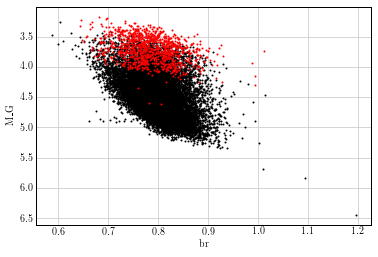

In [103]:
df_main = df_filt[df_filt.main == 1]
df_non_main = df_filt[df_filt.main == 0]

# plot
df_main.viz.scatter("br", "M_G", s=1, c='k')
df_non_main.viz.scatter("br", "M_G", s=1, c='r')
plt.gca().invert_yaxis()

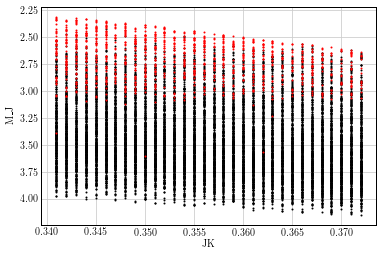

In [104]:
df_main.viz.scatter("JK", "M_J", s=1, c='k')
df_non_main.viz.scatter("JK", "M_J", s=1, c='r')
plt.gca().invert_yaxis()
plt.show()

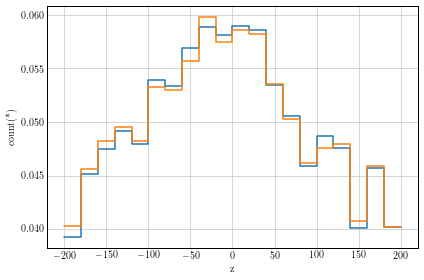

In [106]:
df_main.viz.histogram("z", shape=20, n="normalize")
df.viz.histogram("z", shape=20, n="normalize")

## all in one 

In [ ]:
import torch.nn as nn

class Wide(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(3, 9)
        self.relu = nn.ReLU()
        self.output = nn.Linear(9, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

model = Wide()

# load model
model.load_state_dict(torch.load("model-main.pth"))
model.eval()

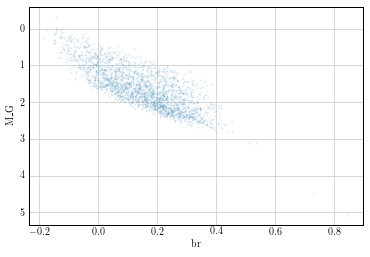

1207.0 / 1915


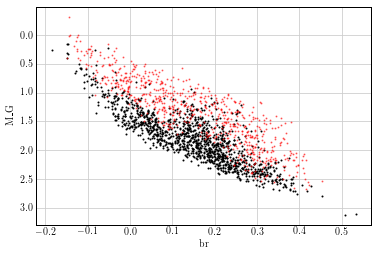

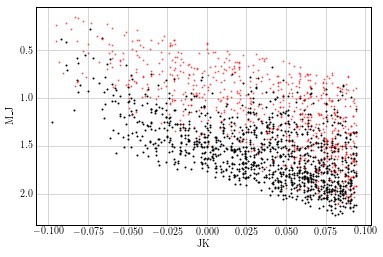

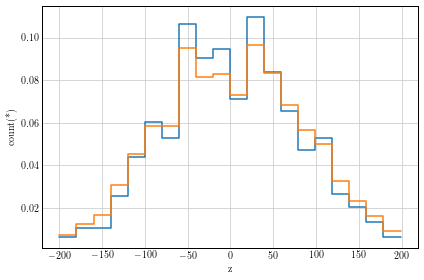

export(hdf5) [########################################] 100.00% elapsed time  :     2.53s =  0.0m =  0.0h             
 

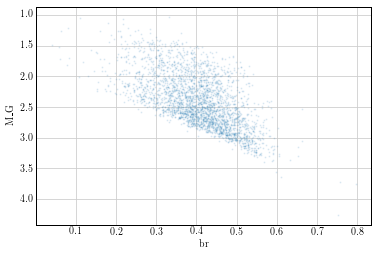

1107.0 / 2724


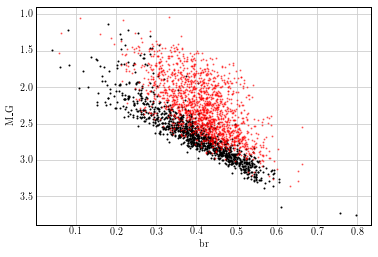

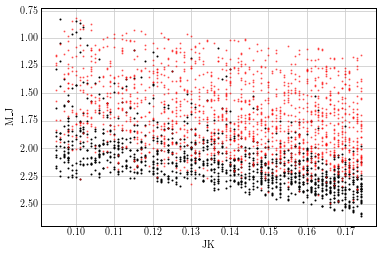

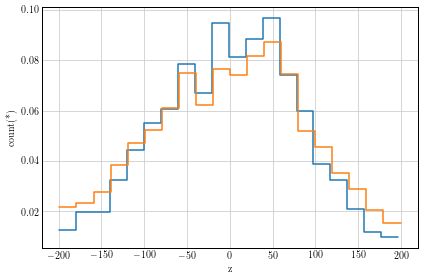

export(hdf5) [########################################] 100.00% elapsed time  :     2.86s =  0.0m =  0.0h              
 

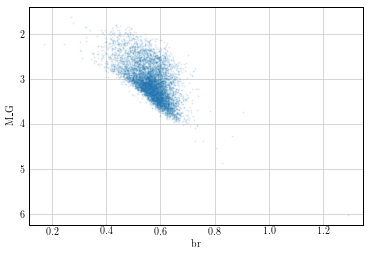

3314.0 / 6194


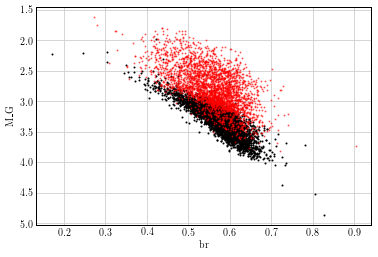

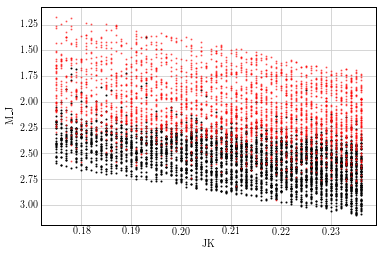

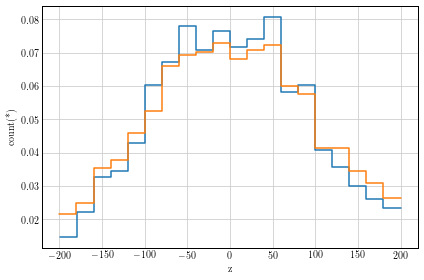

export(hdf5) [########################################] 100.00% elapsed time  :     3.04s =  0.1m =  0.0h          
 

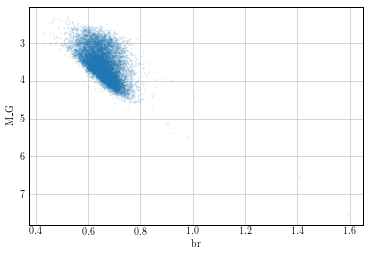

7336.0 / 11005


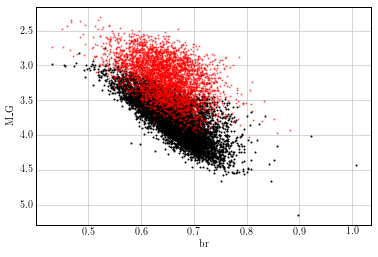

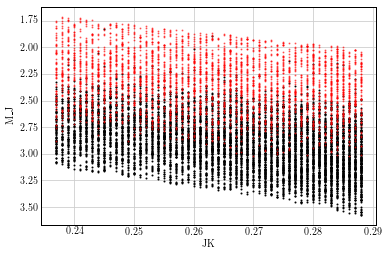

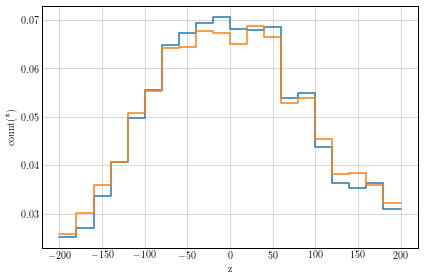

export(hdf5) [########################################] 100.00% elapsed time  :     3.43s =  0.1m =  0.0h     
 

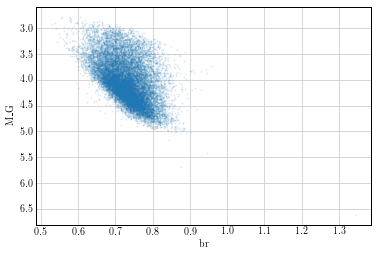

13033.0 / 15984


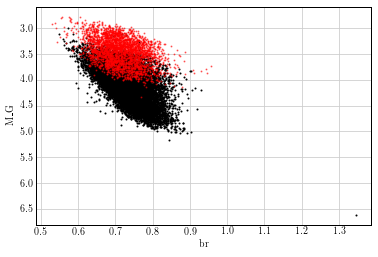

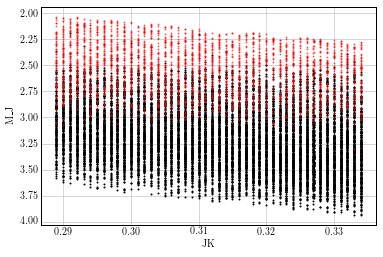

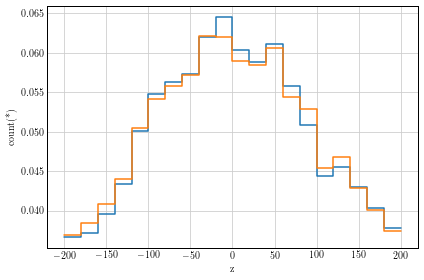

export(hdf5) [########################################] 100.00% elapsed time  :     3.71s =  0.1m =  0.0h      
 

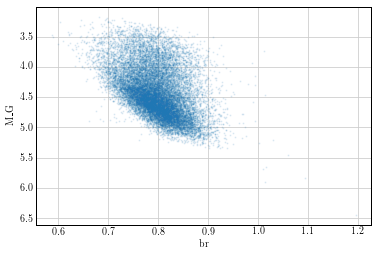

16609.0 / 17981


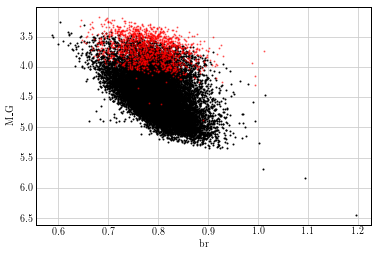

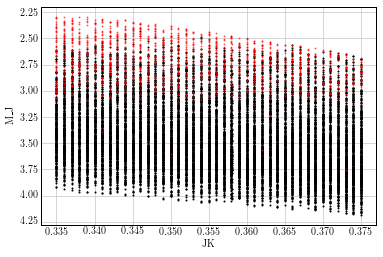

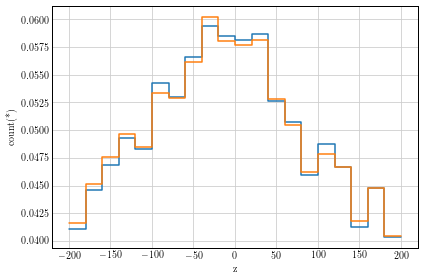

export(hdf5) [########################################] 100.00% elapsed time  :     3.91s =  0.1m =  0.0h     
 

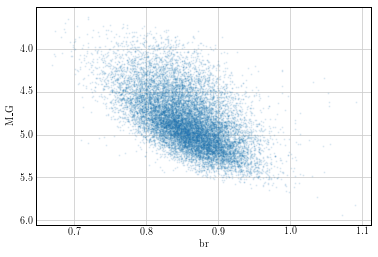

15601.0 / 15704


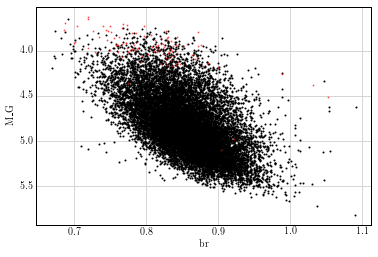

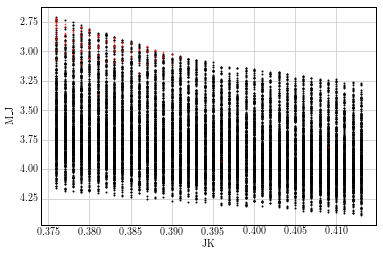

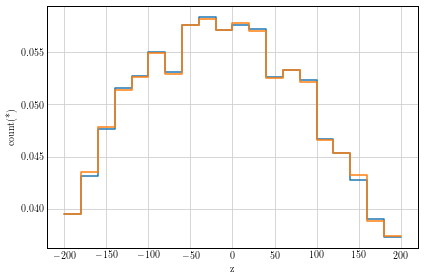

export(hdf5) [########################################] 100.00% elapsed time  :     3.99s =  0.1m =  0.0h      
 

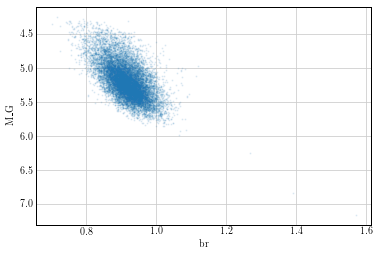

12888.0 / 12894


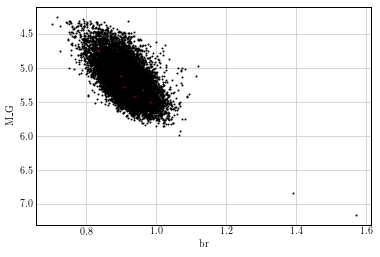

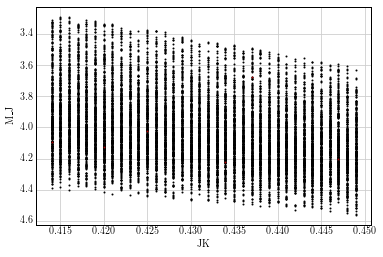

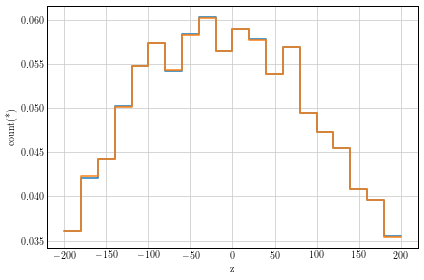

export(hdf5) [########################################] 100.00% elapsed time  :     3.34s =  0.1m =  0.0h       
 

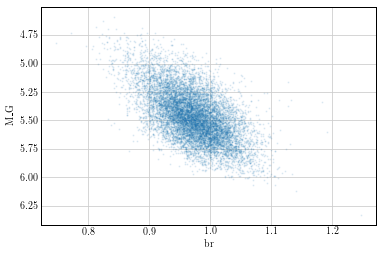

10617.0 / 10622


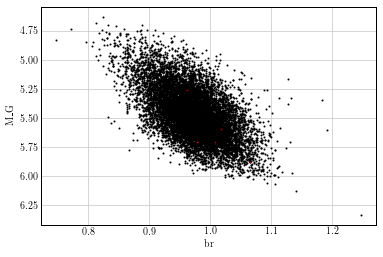

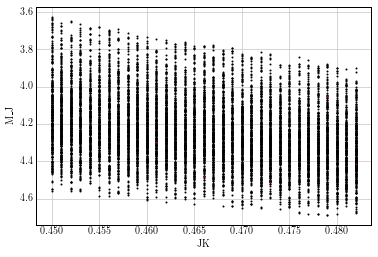

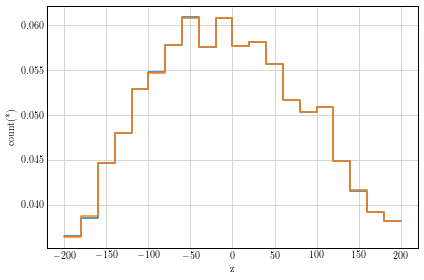

export(hdf5) [########################################] 100.00% elapsed time  :     3.41s =  0.1m =  0.0h     
 

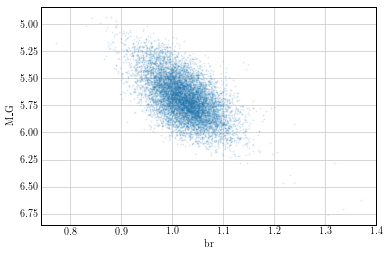

9434.0 / 9442


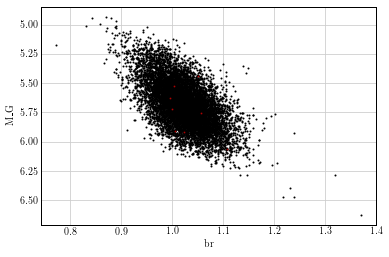

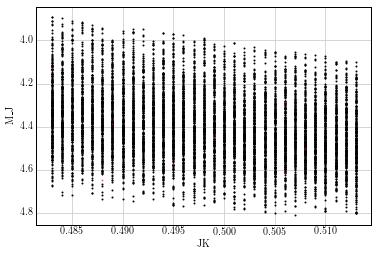

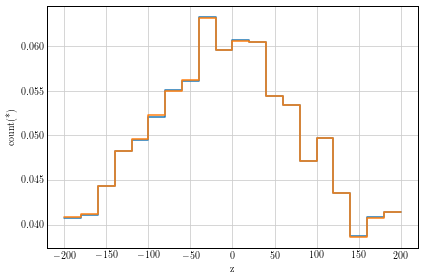

export(hdf5) [########################################] 100.00% elapsed time  :     3.35s =  0.1m =  0.0h   
 

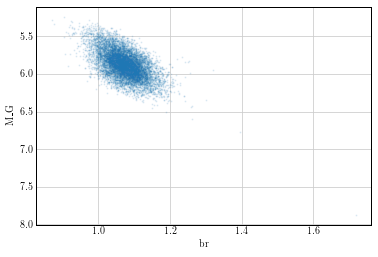

8688.0 / 8696


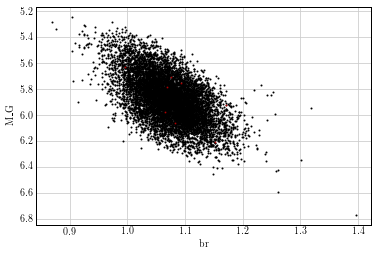

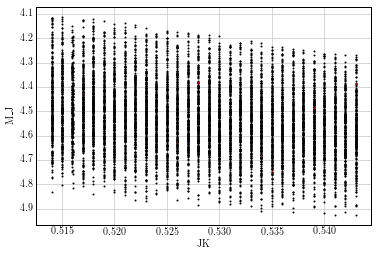

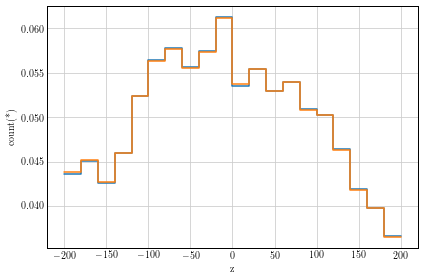

export(hdf5) [########################################] 100.00% elapsed time  :     3.02s =  0.1m =  0.0h  
 

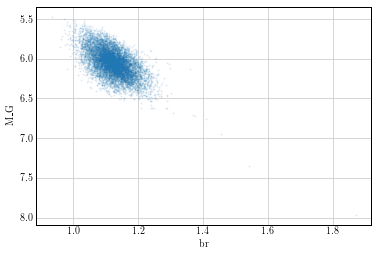

8103.0 / 8113


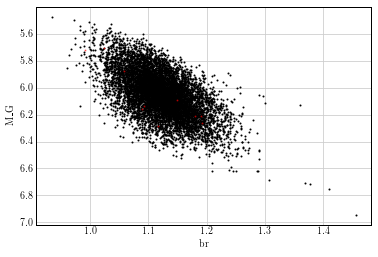

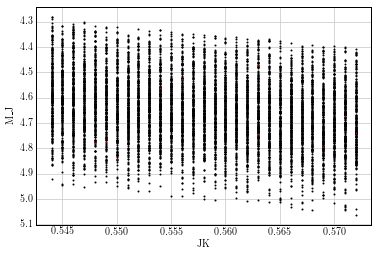

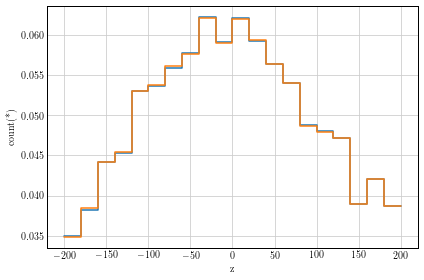

export(hdf5) [########################################] 100.00% elapsed time  :     3.13s =  0.1m =  0.0h           
 

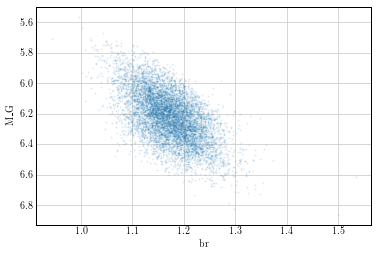

7434.0 / 7444


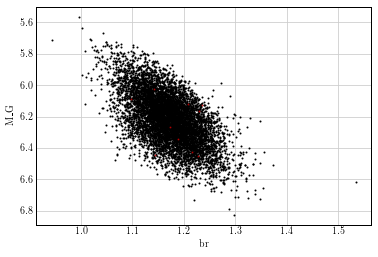

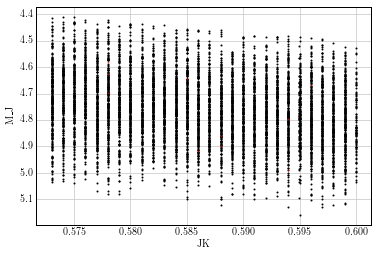

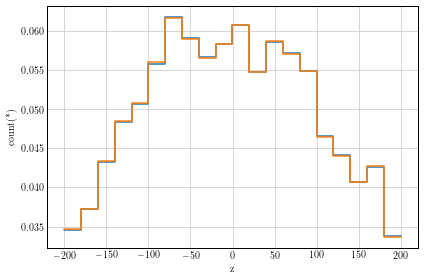

export(hdf5) [########################################] 100.00% elapsed time  :     3.16s =  0.1m =  0.0h         
 

In [122]:
import pickle

scaler = pickle.load(open(join(gums_dir, "scaler-main.pkl"), "rb"))

for file in files:
    name = file.split("/")[-1]
    df = vaex.open(file)
    df['x'] = df.evaluate('r*cos(GLON)')
    df['y'] = df.evaluate('r*sin(GLON)')
    df['br'] = df.evaluate('bpmag-rpmag')
    df['M_G'] = df.evaluate('gmag + 5*log10(parallax/1000) + 5')

    df.viz.scatter("br", "M_G", s=1, alpha=0.1)
    plt.gca().invert_yaxis()
    plt.show()

    df = df.dropna(["logg"])
    df = df.extract()
    X = df[["M_G", "br", "logg"]].to_pandas_df()

    X = scaler.transform(X)

    # convert to tensor
    X = torch.tensor(X, dtype=torch.float32)

    y_pred = model(X)
    y_pred = y_pred.round().detach().numpy().flatten()

    df['main'] = y_pred
    print(y_pred.sum(), "/", len(df))

    df_main = df[df.main == 1]
    df_non_main = df[df.main == 0]

    # plot
    df_main.viz.scatter("br", "M_G", s=1, c='k')
    df_non_main.viz.scatter("br", "M_G", s=1, alpha=0.5, c='r')
    plt.gca().invert_yaxis()
    plt.show()

    df_main.viz.scatter("JK", "M_J", s=1, c='k')
    df_non_main.viz.scatter("JK", "M_J", s=1, alpha=0.5, c='r')
    plt.gca().invert_yaxis()
    plt.show()

    df_main.viz.histogram("z", shape=20, n="normalize")
    df.viz.histogram("z", shape=20, n="normalize")
    plt.show()

    df_main.export_hdf5(join(ml_dir, '2', name), progress=True)

In [124]:
df_training = vaex.open(join(gums_dir, "training-features-main.hdf5"))
df_main = vaex.open(join(gums_dir, "training-main.hdf5"))
df_training

#,M_G,br,logg
0,0.2073501,0.14309636,0.50423455
1,0.3383096,0.28111374,0.5550488
2,0.45702878,0.49024275,0.5912052
3,0.34276977,0.2819223,0.55298585
4,0.33887124,0.32243428,0.5502714
...,...,...,...
"999,995",0.20655873,0.1509257,0.49967426
"999,996",0.31836158,0.2808372,0.5376764
"999,997",0.1557928,0.18162745,0.38990226
"999,998",0.4412022,0.10347706,0.9098805


In [125]:
df_main

#,main
0,1
1,1
2,1
3,1
4,1
...,...
"999,995",1
"999,996",1
"999,997",0
"999,998",0


In [127]:
df_training['main'] = df_main.main.to_numpy()
df_training

#,M_G,br,logg,main
0,0.2073501,0.14309636,0.50423455,1
1,0.3383096,0.28111374,0.5550488,1
2,0.45702878,0.49024275,0.5912052,1
3,0.34276977,0.2819223,0.55298585,1
4,0.33887124,0.32243428,0.5502714,1
...,...,...,...,...
"999,995",0.20655873,0.1509257,0.49967426,1
"999,996",0.31836158,0.2808372,0.5376764,1
"999,997",0.1557928,0.18162745,0.38990226,0
"999,998",0.4412022,0.10347706,0.9098805,0


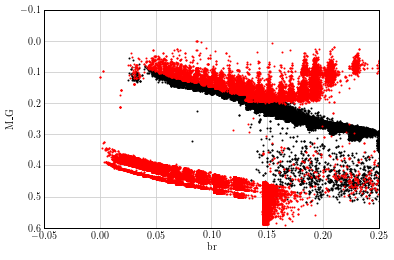

In [132]:
df_m = df_training[df_training.main == 1]
df_nm = df_training[df_training.main == 0]

# plot
df_m.viz.scatter("br", "M_G", s=1, c='k', length_check=False)
df_nm.viz.scatter("br", "M_G", s=1, c='r', length_check=False)
plt.xlim(-0.05, 0.25)
plt.ylim(-0.1, 0.6)
plt.gca().invert_yaxis()